# K-means & Hierarchical clustering checkpoint


## 1. Load Dataset


In [114]:
import pandas as pd

data=pd.read_csv("CC GENERAL.csv")
data.drop("CUST_ID",axis=1, inplace=True)
data.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 2 Preprocessing step

In [115]:
print("After preprocessing: \n", data.isna().sum())
print("\n \n")

#delete the row containing  nan value for CREDIT_LIMIT column
data.dropna(subset=["CREDIT_LIMIT"],inplace=True)

#replace nan value of MINIMUM_PAYMENTS column
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)


After preprocessing: 
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

 



### 2.1 Normalize  data on the dataset

In [138]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler()
data_scale=mm_scaler.fit_transform(data)
col_names = list(data.columns)

data_scale=pd.DataFrame(data_scale,columns=col_names)

### 2.2 Apply PCA

applying pca to reduce the dimension of data set and the fitting time of algorithms

In [139]:
from sklearn.decomposition import PCA 


In [140]:
pca = PCA(n_components = 2) 
data_principal = pca.fit_transform(data_scale) 
data_principal = pd.DataFrame(data_principal) 
data_principal.columns = ['P1', 'P2'] 

## 3. Use hierarchical clustering to identify the inherent groupings within your data

In [141]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc



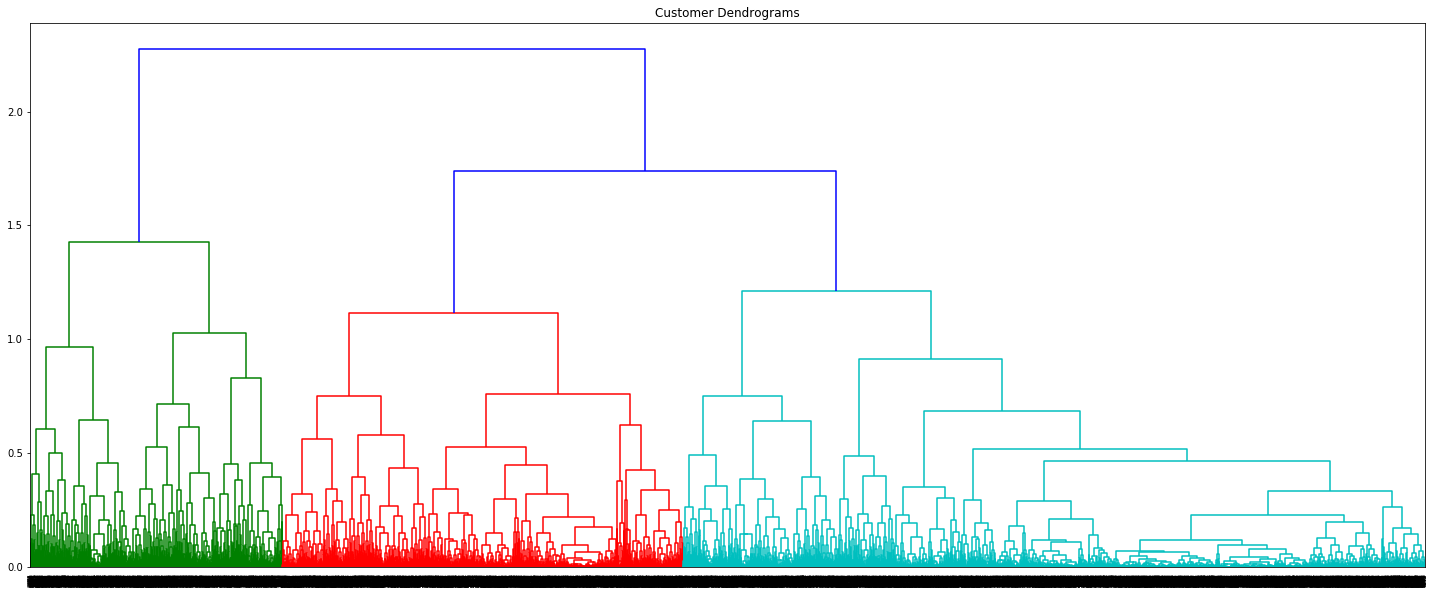

In [142]:
data_hier=data_principal
plt.figure(figsize=(25,10))
plt.title("CC Dendrograms")
dend=shc.dendrogram(shc.linkage(data_hier, method="complete"))

we can determine  the optimal number of clusters by visualizing the data above:
the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 


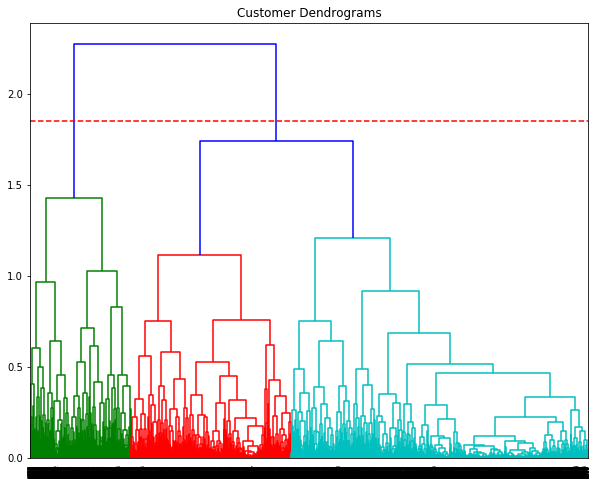

In [63]:
plt.figure(figsize=(10,8))
plt.title("CC Dendrograms")
dend=shc.dendrogram(shc.linkage(data_hier, method="complete"))
plt.axhline(y=1.85, color='r', linestyle='--')

### 3.1 AgglomerativeClustering for k=2

In [121]:
from sklearn.cluster import AgglomerativeClustering

In [122]:

model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_hier) 
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,0
4,0
...,...
8944,0
8945,0
8946,0
8947,0


## 4. Plot the clusters

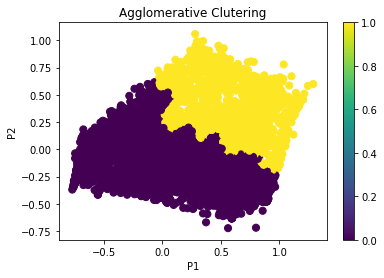

In [123]:

fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data_hier ['P1'] , data_hier ["P2"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

# Applying K means clustering

In [124]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

## 5 Define the best value of k

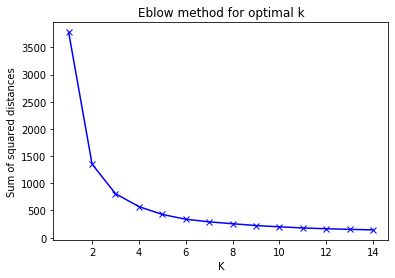

In [125]:
data_kmean=data_principal

num_sq_dst=[]
rng=range(1,15)
for k in rng:
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans=kmeans.fit(data_kmean) 
    num_sq_dst.append(kmeans.inertia_)#Sum of squared distances of samples to their closest cluster center.
plt.plot(rng,num_sq_dst,'bx-')
plt.xlabel("K")
plt.ylabel("Sum of squared distances")
plt.title("Eblow method for optimal k")
plt.show()

### From the graph below we can see that the "Eblow" is represented for a value of k equal to 3

## 6 Apply kmeans for 3 clusters

In [126]:

kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 3 as number of clusters
kmeans.fit(data_kmean)
clust_labels = kmeans.predict(data_kmean)
cent = kmeans.cluster_centers_
X = pd.DataFrame(clust_labels)
data_principal.insert((data_kmean.shape[1]),'kmeans',X)


## 7. Plot the clusters

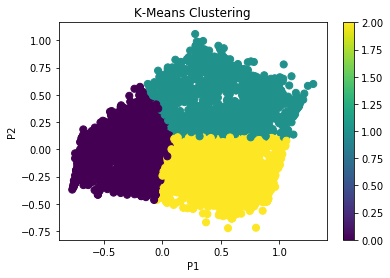

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_kmean['P1'],data_kmean['P2'],
                     c=X[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
plt.colorbar(scatter)

## 8. Compare hierarchical and kmeans clustering

### 8.1 agglomerative clusturing for k=3

In [128]:
data_hier=data_principal
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_hier) 
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,0
3,1
4,1
...,...
8944,2
8945,2
8946,2
8947,1


### 8.2 Plt agglomerative clusturing for k=3

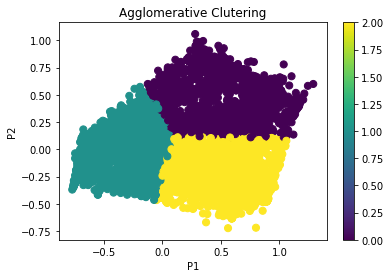

In [129]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data_hier ['P1'] , data_hier ["P2"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)

### if we compare between the two figure above we can see that the two methodes gives nearly the same clusters!